# Admissions Data predictions with Deep Learning

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers



In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [90]:
# Verification for the device rurning on tensorflow
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11453203829164444630
xla_global_id: -1
]


In [91]:
df = pd.read_csv("admissions_data.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [104]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [115]:
print("Mean of columns in the DataFrame: \n")
df.mean()

Mean of columns in the DataFrame: 



Serial No.           250.50000
GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64

## Split the data 

In [92]:
labels = df.iloc[:,-1]
features = df.iloc[:, 1:-1]

features_train_set, features_test_set, labels_train_set, labels_test_set = train_test_split(features, labels, test_size = 0.3)

In [93]:
features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


# Scaling

In [94]:
scaler = StandardScaler()
features_train_set = scaler.fit_transform(features_train_set)
features_test_set = scaler.transform(features_test_set)

print(features_train_set.shape)

(350, 7)


In [95]:
features_train_set

array([[-1.70748797, -1.00448737, -0.08765765, ...,  0.54335483,
        -1.50804736,  0.88640526],
       [-0.83005325, -0.02563657, -0.96423417, ..., -0.00312273,
        -0.09681748,  0.88640526],
       [ 0.9248162 ,  1.27949783,  0.78891886, ...,  0.54335483,
         0.93255019, -1.12815215],
       ...,
       [ 0.13512495,  0.46378883, -1.84081068, ..., -0.00312273,
        -0.06361208,  0.88640526],
       [-0.39133589, -1.00448737, -0.96423417, ..., -0.00312273,
        -0.8937473 ,  0.88640526],
       [-1.44425755, -0.35192017, -1.84081068, ..., -1.64255541,
        -1.2922122 , -1.12815215]])

# Building a Sequential model

In [96]:
model = keras.Sequential(
    [   layers.InputLayer(input_shape=(features_train_set.shape[1])),
        layers.Dense(16, activation="relu", name="layer1"),
        layers.Dropout(0.1),
        layers.Dense(1)
    ]
)

print(model.summary())

In [ ]:
model = keras.Sequential(
    [   layers.InputLayer(input_shape=(features_train_set.shape[1])),
        layers.Dense(16, activation="relu", name="layer1"),
        layers.Dropout(0.1),
        layers.Dense(1)
    ]
)

print(model.summary())

In [ ]:
model = keras.Sequential(
    [   layers.InputLayer(input_shape=(features_train_set.shape[1])),
        layers.Dense(16, activation="relu", name="layer1"),
        layers.Dropout(0.1),
        layers.Dense(1)
    ]
)

print(model.summary())

In [97]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(loss='mse', metrics=['mae'], optimizer = opt)

## Fit the model

In [98]:
model.fit(features_train_set, labels_train_set, epochs=50, batch_size=3, verbose=1)

Epoch 1/50
117/117 [==============================] - 1s 2ms/step - loss: 0.1439 - mae: 0.2662
Epoch 2/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0274 - mae: 0.1216
Epoch 3/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0141 - mae: 0.0930
Epoch 4/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0097 - mae: 0.0760
Epoch 5/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0091 - mae: 0.0710
Epoch 6/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0637
Epoch 7/50
117/117 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0567
Epoch 8/50
117/117 [==============================] - 0s 3ms/step - loss: 0.0052 - mae: 0.0548
Epoch 9/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0053 - mae: 0.0542
Epoch 10/50
117/117 [==============================] - 0s 2ms/step - loss: 0.0053 - mae: 0.0541
Epoch 11/50
117/117 [============================

## Test the accuracy of the regression

In [99]:
val_mse, val_mae = model.evaluate(features_test_set, labels_test_set, verbose = 0)

print(val_mse, val_mae)

# evauate r-squared score
y_pred = model.predict(features_test_set)

print(r2_score(labels_test_set,y_pred))

0.0034979605115950108 0.04443364962935448
5/5 [==============================] - 0s 897us/step
0.8001736524019702


## Adjust Hyperparameters
- number of epochs
- size of the batch_size
- add more hidden layers
- tweek the optimizer and/or activation functions

In [100]:
model2 = keras.Sequential(
    [   layers.InputLayer(input_shape=(features_train_set.shape[1])),
        layers.Dense(16, activation="relu", name="layer1"),
        layers.Dropout(0.1),
        layers.Dense(8, activation="relu", name="layer2"),
        layers.Dropout(0.2),
        layers.Dense(1)
    ]
)

print(model2.summary())

Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 0.2384 - mae: 0.3842 - val_loss: 0.0721 - val_mae: 0.2292
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0978 - mae: 0.2508 - val_loss: 0.0371 - val_mae: 0.1621
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.2111 - val_loss: 0.0255 - val_mae: 0.1308
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0483 - mae: 0.1753 - val_loss: 0.0210 - val_mae: 0.1152
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0374 - mae: 0.1579 - val_loss: 0.0210 - val_mae: 0.1253
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0261 - mae: 0.1306 - val_loss: 0.0123 - val_mae: 0.0934
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0273 - mae: 0.1291 - val_loss: 0.0107 - val_mae: 0.0869
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0202 - m

In [ ]:
opt = Adam(learning_rate=0.005)

model2.compile(loss='mse', metrics=['mae'], optimizer = opt)

# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

history = model2.fit(features_train_set, labels_train_set, epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

In [101]:
val_mse_2, val_mae_2 = model2.evaluate(features_test_set, labels_test_set, verbose = 0)

# view the MAE performance
print("MAE: ", val_mae_2)

MAE:  0.05863048508763313
5/5 [==============================] - 0s 3ms/step
0.7298284145062601


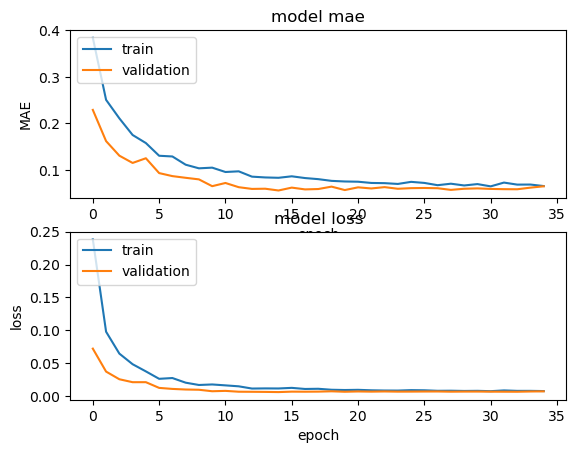

In [102]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()